# Predictive Analytics HW2

## Import libararies

In [2]:
%matplotlib inline
from sklearn.utils.validation import column_or_1d
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn import svm,datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn import neighbors, linear_model, metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.multiclass import OneVsRestClassifier
from scipy.stats import scoreatpercentile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import label_binarize
import scikitplot as skplt

#plt.style.use('ggplot')

## Data importing and processing

In [3]:
wdbc = pd.read_csv("wdbc.data", header = None, names = ['id', 'diagnosis', 
                            'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
                            'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se',
                            'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'])
wdbc = wdbc.replace({'M': 0, 'B': 1})

##  Explore the dataset

In [4]:
n_samples, n_features = wdbc.shape
print ('The dimensions of the data set are', n_samples, 'by', (n_features-2))

The dimensions of the data set are 569 by 30


## Observe the correlation matrix and create heat map

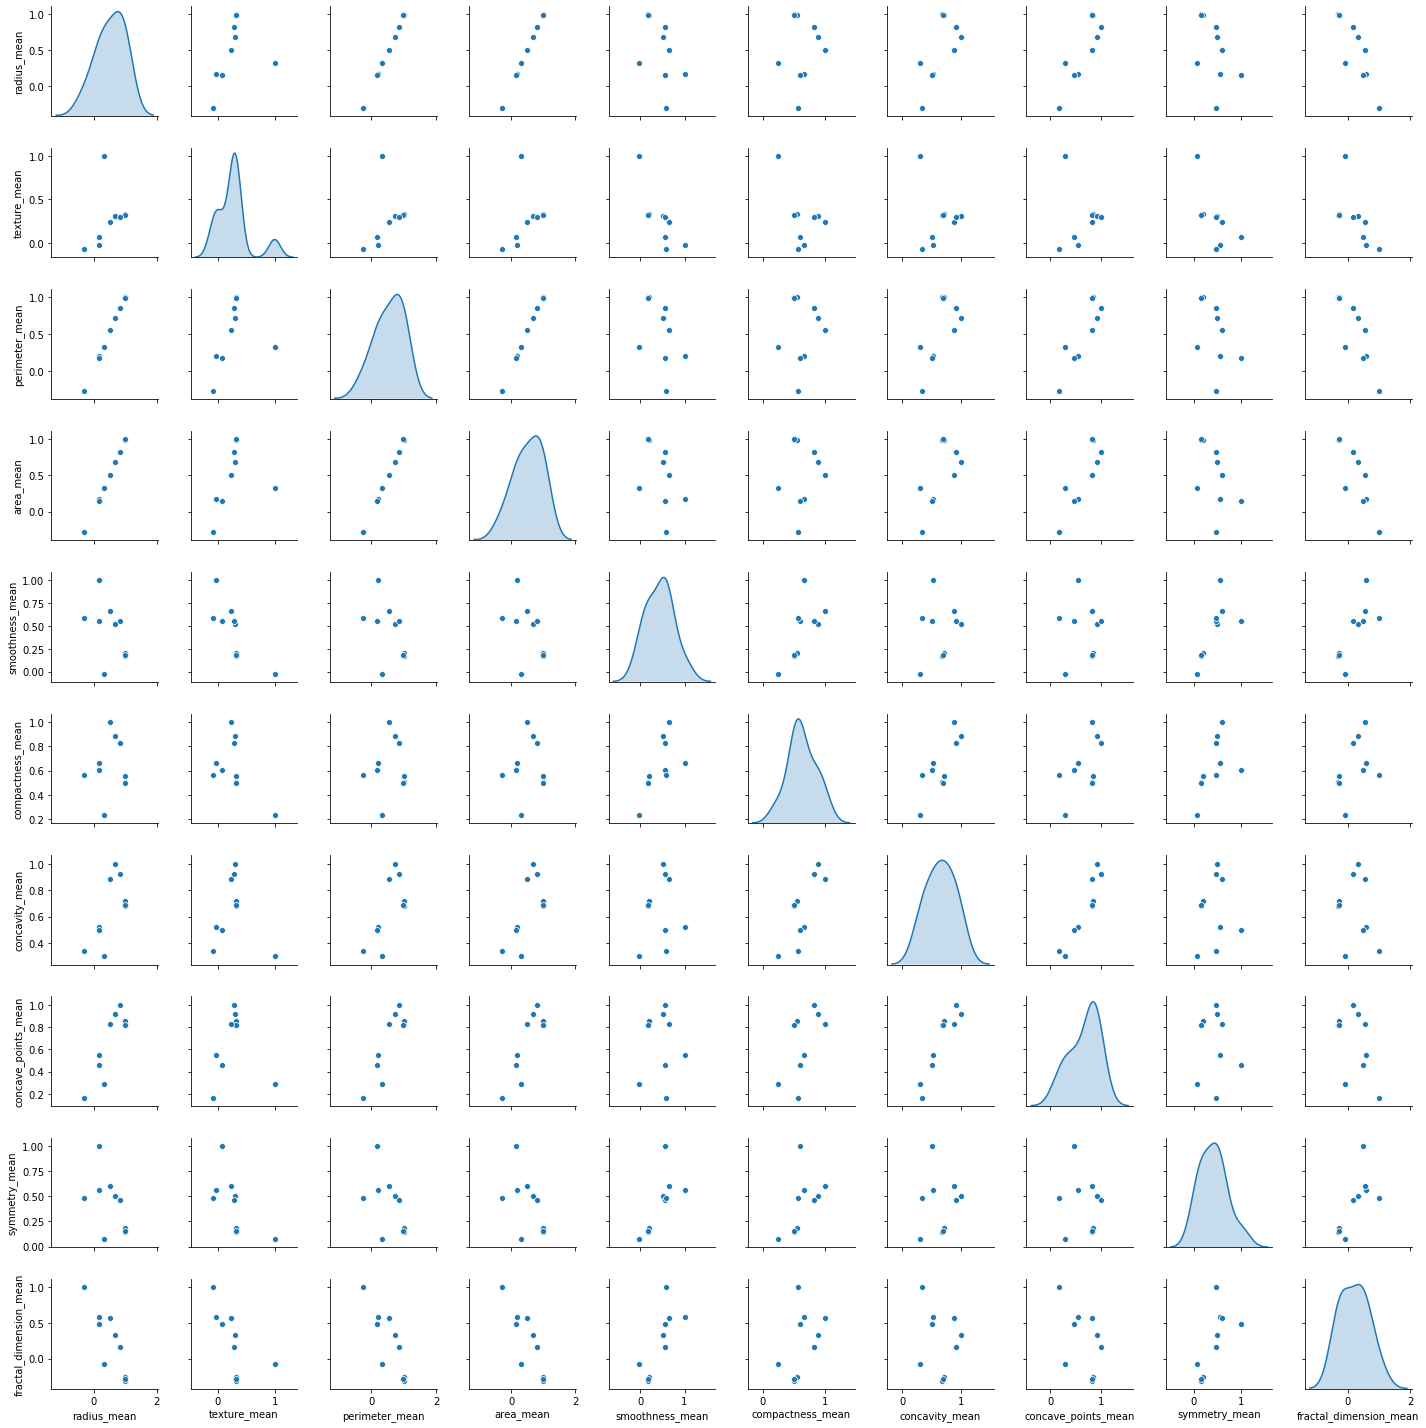

In [5]:
featureMeans = list(wdbc.columns[2:12])

correlationData = wdbc[featureMeans].corr()
sns.pairplot(wdbc[featureMeans].corr(), diag_kind='kde', height=2); 

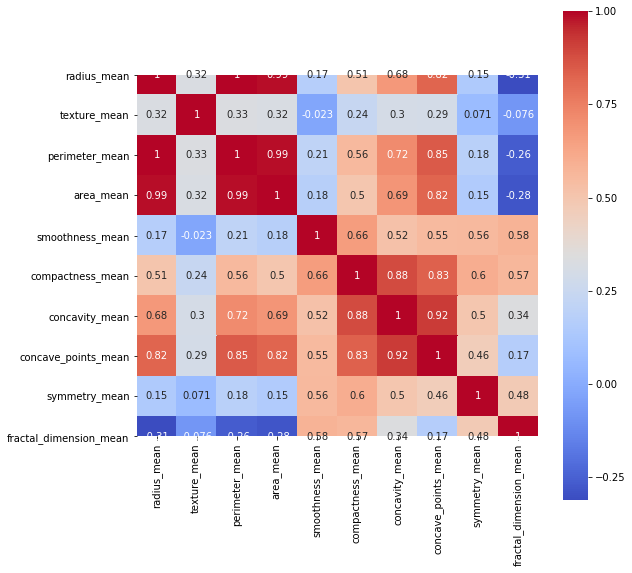

In [6]:
plt.figure(figsize=(9,9))
sns.heatmap(wdbc[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

## Select features X and Y

In [7]:
features = wdbc.columns[2:]
X = wdbc[features].values
y = wdbc['diagnosis'].values

## 1. Decision Tree Model

When max_depth = 4
	
The cross validation result:  [0.93103448 0.84482759 0.92982456 0.85964912 0.98245614 0.9122807
 0.89473684 0.92857143 0.91071429 1.        ]
	
Confusion matrix:
[[ 58   1]
 [  0 112]]
	
Accuracy: 0.92 (+/- 0.09)
	
The kappa stats is:  0.987009040492289
	
The MCC stats is:  0.9870923373402705
	
The AUC stats is:  0.9915254237288136
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.99      1.00      1.00       112

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171





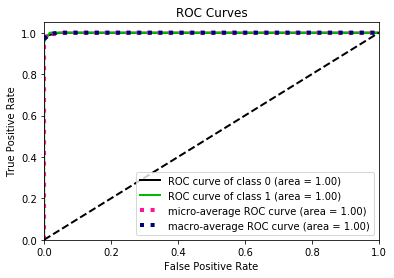

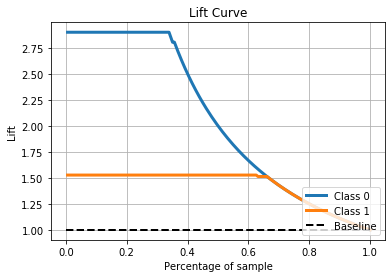

When max_depth = 5
	
The cross validation result:  [0.93103448 0.86206897 0.92982456 0.87719298 0.96491228 0.89473684
 0.85964912 0.94642857 0.92857143 0.98214286]
	
Confusion matrix:
[[ 64   1]
 [  0 106]]
	
Accuracy: 0.92 (+/- 0.08)
	
The kappa stats is:  0.987553679307082
	
The MCC stats is:  0.9876301796092776
	
The AUC stats is:  0.9923076923076923
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        65
           1       0.99      1.00      1.00       106

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171





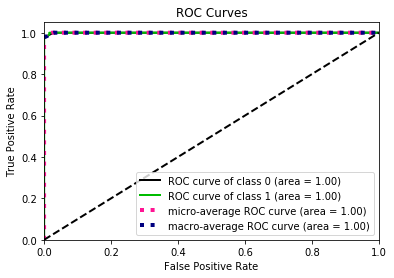

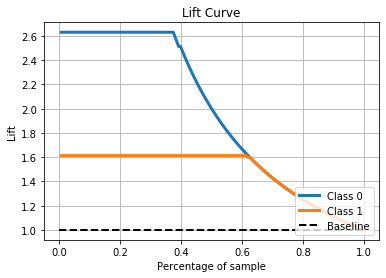

When max_depth = 6
	
The cross validation result:  [0.9137931  0.87931034 0.92982456 0.89473684 0.9122807  0.89473684
 0.9122807  0.94642857 0.91071429 1.        ]
	
Confusion matrix:
[[ 63   0]
 [  0 108]]
	
Accuracy: 0.92 (+/- 0.06)
	
The kappa stats is:  1.0
	
The MCC stats is:  1.0
	
The AUC stats is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00       108

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171





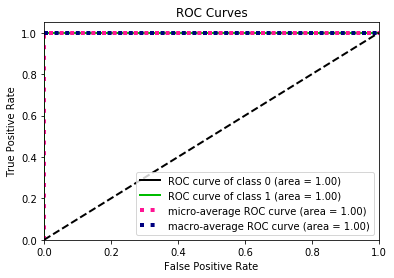

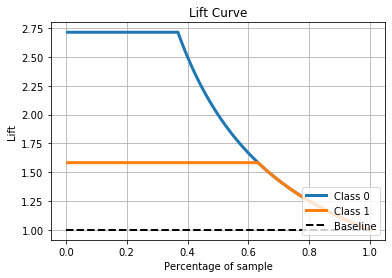

When max_depth = 7
	
The cross validation result:  [0.87931034 0.89655172 0.9122807  0.9122807  0.96491228 0.9122807
 0.85964912 0.94642857 0.92857143 1.        ]
	
Confusion matrix:
[[ 65   0]
 [  0 106]]
	
Accuracy: 0.92 (+/- 0.08)
	
The kappa stats is:  1.0
	
The MCC stats is:  1.0
	
The AUC stats is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       106

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171





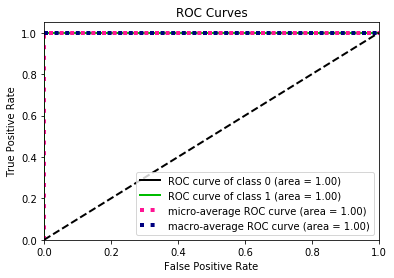

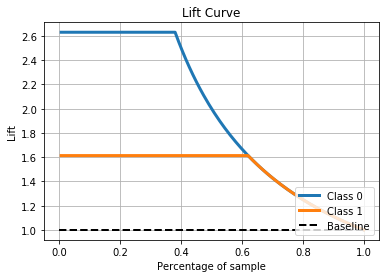

In [10]:
for m in range(4,8):
    clf = tree.DecisionTreeClassifier(max_depth = m)
    clf = clf.fit(X, y)
    # cross validation
    scores = cross_val_score(clf, X, y, cv=10)
    #Splitting data into training set (70%) and testing set (30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    y_true, y_pred = y_test, clf.predict(X_test)
    print("When max_depth =", m)
    print ('\t')
    print("The cross validation result: ", scores)
    print ('\t')
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))
    print ('\t')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print ('\t')
    print("The kappa stats is: ", cohen_kappa_score(y_true, y_pred))
    print ('\t')
    print("The MCC stats is: ", matthews_corrcoef(y_true, y_pred))
    print ('\t')
    # auc value
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    print("The AUC stats is: ", auc)
    
    # Classification report
    print(classification_report(y_true, y_pred))
    print('\n')
    predicted_probas_clf = clf.predict_proba(X_test)
    # roc curve
    skplt.metrics.plot_roc(y_test, predicted_probas_clf)
    # lift curve
    skplt.metrics.plot_lift_curve(y_test, predicted_probas_clf)
    plt.show()
    

    #y_score = clf.fit(X_train, y_train).decision_function(X_test)
#     fpr, tpr, _ = roc_curve(y_test, y_pred)
#     roc_auc = auc(fpr, tpr)
#     plt.figure()
#     lw = 2
#     plt.plot(fpr, tpr, color='darkorange',
#              lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     plt.legend(loc="lower right")
#     plt.show()


## 2. Logistic Regression Model

/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed 

The cross validation result:  [0.94827586 0.94827586 0.98245614 0.94736842 0.92982456 0.98245614
 0.96491228 0.98214286 0.98214286 0.98214286]
Confusion matrix:
[[ 62   2]
 [  0 107]]
Accuracy: 0.96 (+/- 0.04)
The kappa stats is:  -0.11334714412548097
The MCC stats is:  -0.11334714412548091
The AUC stats is:  0.9753246753246755
              precision    recall  f1-score   support

           0       0.35      0.37      0.36        62
           1       0.63      0.61      0.62       109

    accuracy                           0.52       171
   macro avg       0.49      0.49      0.49       171
weighted avg       0.53      0.52      0.52       171



/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


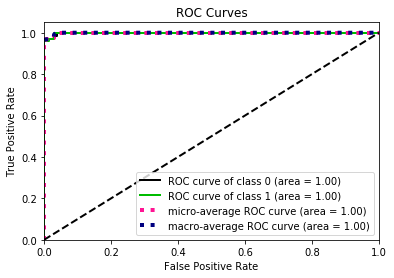

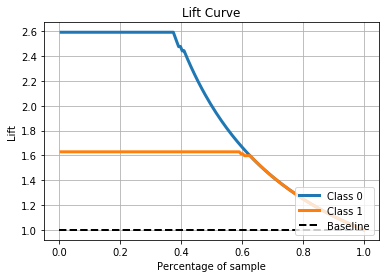

In [18]:
lr = LogisticRegression(C=1e5,multi_class='multinomial',solver ='newton-cg')
lr = lr.fit(X, y)

# cross validation
scores = cross_val_score(lr, X, y, cv=10)
print("The cross validation result: ", scores)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The kappa stats is: ", cohen_kappa_score(y_true, y_pred))
print("The MCC stats is: ", matthews_corrcoef(y_true, y_pred))
#Splitting data into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
Y_true, y_pred = y_test, lr.predict(X_test)
# auc value
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print("The AUC stats is: ", auc)
# Classification report
print(classification_report(y_true, y_pred))
# knn
predicted_probas_lr = lr.predict_proba(X_test)
# roc curve
skplt.metrics.plot_roc(y_test, predicted_probas_lr)

# lift curve
skplt.metrics.plot_lift_curve(y_test, predicted_probas_lr)
plt.show()




# y_score = lr.fit(X_train, y_train).decision_function(X_test)
# fpr, tpr, _ = roc_curve(y_test, y_score)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

## 3. KNN Model

When neighbors = 3
The cross validation result:  [0.9137931  0.86206897 0.89473684 0.94736842 0.94736842 0.94736842
 0.96491228 0.94642857 0.91071429 0.92857143]
Confusion matrix:
[[ 55   5]
 [  2 109]]
Accuracy: 0.93 (+/- 0.06)
The kappa stats is:  0.9090909090909091
The MCC stats is:  0.9097816785925636
The AUC stats is:  0.9493243243243242
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        60
           1       0.96      0.98      0.97       111

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171





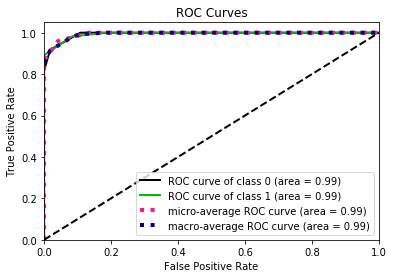

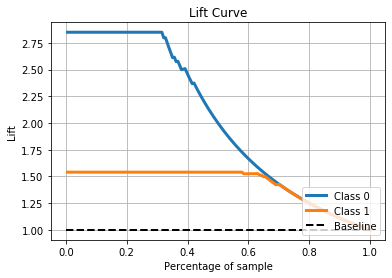

When neighbors = 4
The cross validation result:  [0.9137931  0.87931034 0.89473684 0.94736842 0.94736842 0.94736842
 0.96491228 0.91071429 0.875      0.92857143]
Confusion matrix:
[[ 57   4]
 [  2 108]]
Accuracy: 0.92 (+/- 0.06)
The kappa stats is:  0.9229845368563279
The MCC stats is:  0.9232888302415534
The AUC stats is:  0.9581222056631894
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        61
           1       0.96      0.98      0.97       110

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171





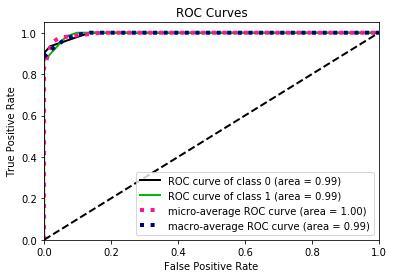

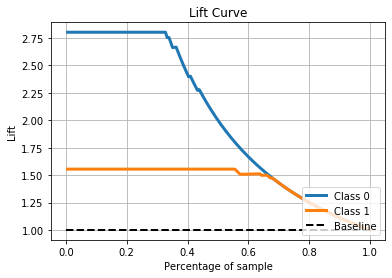

When neighbors = 5
The cross validation result:  [0.9137931  0.87931034 0.89473684 0.96491228 0.94736842 0.92982456
 0.96491228 0.92857143 0.91071429 0.96428571]
Confusion matrix:
[[ 55   8]
 [  5 103]]
Accuracy: 0.93 (+/- 0.06)
The kappa stats is:  0.8350033400133601
The MCC stats is:  0.8356092901248081
The AUC stats is:  0.9133597883597884
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        63
           1       0.93      0.95      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171





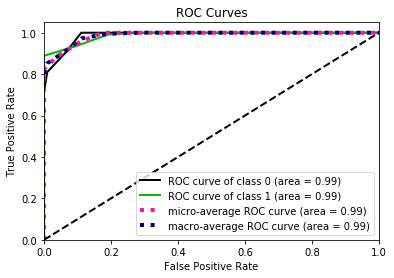

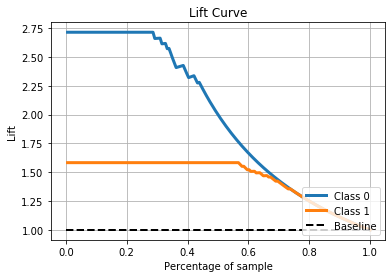

When neighbors = 6
The cross validation result:  [0.9137931  0.87931034 0.89473684 0.96491228 0.94736842 0.92982456
 0.96491228 0.92857143 0.89285714 0.94642857]
Confusion matrix:
[[ 54   2]
 [  2 113]]
Accuracy: 0.93 (+/- 0.06)
The kappa stats is:  0.9468944099378882
The MCC stats is:  0.9468944099378882
The AUC stats is:  0.9734472049689441
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.98      0.98      0.98       115

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171





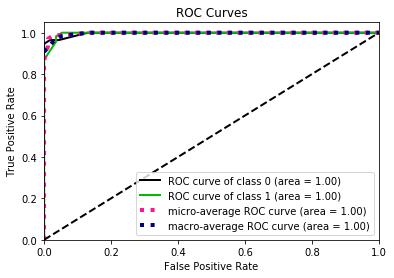

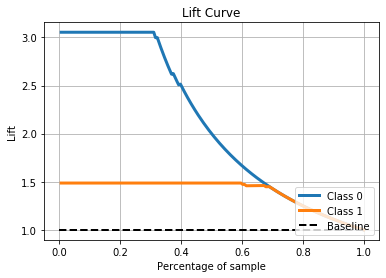

In [20]:
 for n_neighbors in range(3,7):
    knn = neighbors.KNeighborsClassifier(n_neighbors)
    knn = knn.fit(X, y)
    #Splitting data into training set (70%) and testing set (30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    y_true, y_pred = y_test, knn.predict(X_test)
    # cross validation
    scores = cross_val_score(knn, X, y, cv=10)
    print("When neighbors =", n_neighbors)
    print("The cross validation result: ", scores)
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("The kappa stats is: ", cohen_kappa_score(y_true, y_pred))
    print("The MCC stats is: ", matthews_corrcoef(y_true, y_pred))
    # auc value
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    print("The AUC stats is: ", auc)
    
    # Classification report
    print(classification_report(y_true, y_pred))
    print('\n')
    # knn
    predicted_probas_knn = knn.predict_proba(X_test)
    # roc curve
    skplt.metrics.plot_roc(y_test, predicted_probas_knn)

    # lift curve
    skplt.metrics.plot_lift_curve(y_test, predicted_probas_knn)
    plt.show()
    
#     #y_score = knn.fit(X_train, y_train).decision_function(X_test)
#     fpr, tpr, _ = roc_curve(y_test, y_pred)
#     roc_auc = auc(fpr, tpr)

#     plt.figure()
#     lw = 2
#     plt.plot(fpr, tpr, color='darkorange',
#              lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     plt.legend(loc="lower right")
#     plt.show()


## 4. SVM Model

In [25]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C, probability=True).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C, probability=True).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
# cross validation
scores_1 = cross_val_score(svc, X, y, cv=20)
scores_2 = cross_val_score(rbf_svc, X, y, cv=20)
scores_3 = cross_val_score(lin_svc, X, y, cv=20)

# Classification report
# auc value
y_true_1, y_pred_1 = y_test, svc.predict(X_test)
fpr_1, tpr_1, threshold_1 = roc_curve(y_test, y_pred_1)
auc = metrics.auc(fpr_1, tpr_1)
print("The AUC stats is: ", auc)
print(scores_1,'\n')
print(classification_report(y_true_1, y_pred_1))
print('\n')

y_true_2, y_pred_2 = y_test, rbf_svc.predict(X_test)
fpr_2, tpr_2, threshold_2 = roc_curve(y_test, y_pred_2)
auc = metrics.auc(fpr_2, tpr_2)
print("The AUC stats is: ", auc)
print(scores_2,'\n')
print(classification_report(y_true_2, y_pred_2))
print('\n')

y_true_3, y_pred_3 = y_test, lin_svc.predict(X_test)
fpr_3, tpr_3, threshold_3 = roc_curve(y_test, y_pred_3)
auc = metrics.auc(fpr_3, tpr_3)
print("The AUC stats is: ", auc)
print(scores_3,'\n')
print(classification_report(y_true_3, y_pred_3))
print('\n')



/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, i

The AUC stats is:  0.991304347826087
[1.         0.96551724 1.         0.86206897 0.93103448 0.89655172
 0.96551724 0.93103448 0.96551724 0.93103448 0.96551724 1.
 0.96428571 0.89285714 0.96428571 0.89285714 0.96428571 1.
 0.96296296 0.96296296] 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.98      0.99       115

    accuracy                           0.99       171
   macro avg       0.98      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



The AUC stats is:  1.0
[0.62068966 0.62068966 0.62068966 0.62068966 0.62068966 0.62068966
 0.62068966 0.62068966 0.62068966 0.62068966 0.62068966 0.62068966
 0.64285714 0.64285714 0.64285714 0.64285714 0.64285714 0.62962963
 0.62962963 0.62962963] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00       115

    accur

/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/peiningfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, i

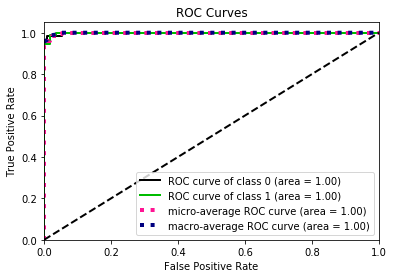

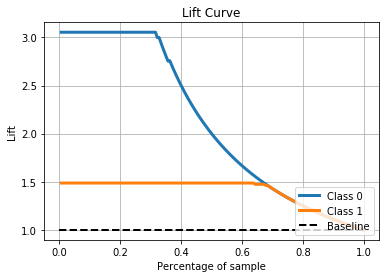

In [22]:
# Use lin_svc model
linear_svc = SVC(kernel='linear', gamma='scale', C=1.0, probability=True).fit(X_train, y_train)
predicted_probas_linear_svc = linear_svc.predict_proba(X_test)


# roc curve
skplt.metrics.plot_roc(y_test, predicted_probas_linear_svc)

# lift curve
skplt.metrics.plot_lift_curve(y_test, predicted_probas_linear_svc)
plt.show()

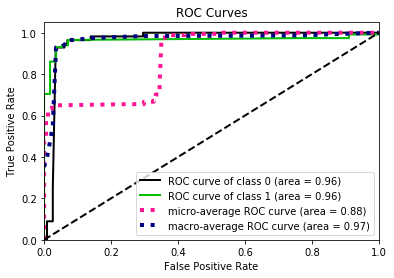

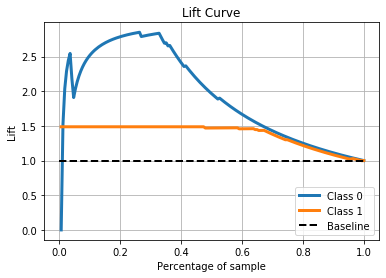

In [23]:
# Use rbf_svc model
rbf_svc = SVC(kernel='rbf', gamma='auto', C = 1, probability=True).fit(X_train, y_train)
predicted_probas_rbf_svc = rbf_svc.predict_proba(X_test)
# roc curve
skplt.metrics.plot_roc(y_test, predicted_probas_rbf_svc)

# lift curve
skplt.metrics.plot_lift_curve(y_test, predicted_probas_rbf_svc)
plt.show()